In [384]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib qt

import numpy as np
from numpy import *
from scipy.fft import fft, ifft, fftshift, ifftshift
from scipy.optimize import curve_fit

import os
import scipy.io as sio

def psd(f, A1, B):
    return (A1/f)+B

def get_fit(x_data, y_data):
    valid = (x_data > 0) & (y_data > 0) & np.isfinite(y_data)
    x_clean = x_data[valid]
    y_clean = y_data[valid]

    params, params_cov = curve_fit(
        psd,
        x_clean,
        y_clean,
#         p0=[1e-6, 1e-6],
#         bounds=(0, np.inf)  # all parameters >= 0
    )

    A1, B = params
    
    return A1, B, x_clean, y_clean

In [385]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'

folders = os.listdir(initial_folder)
for i in range(len(folders)):
    if ".fig" in folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folders[i])

[0] -----------> 1st_tone
[1] -----------> Alan_var
[2] -----------> fast_saturation
[3] -----------> Gain_sweep_1000mK2025-07-17-22-37-20.mat
[4] -----------> Gain_sweep_10mK_power_freq2025-07-21-19-09-34.mat
[5] -----------> Gain_sweep_10mK_power_freq_1.382025-07-22-02-40-22.mat
[6] -----------> Gain_sweep_10mK_power_sweep_0.412025-07-22-12-30-24.mat
[7] -----------> Gain_sweep_10mK_power_sweep_0.412025-07-22-12-38-47.mat
[8] -----------> Gain_sweep_10mK_power_sweep_0.412025-07-22-12-40-36.mat
[9] -----------> Gain_sweep_12mK2025-05-29-12-17-35.mat
[10] -----------> Gain_sweep_12mK2025-05-29-13-27-37.mat
[11] -----------> Gain_sweep_12mK2025-06-03-10-58-46.mat
[12] -----------> Gain_sweep_12mK2025-06-03-18-18-22.mat
[13] -----------> Gain_sweep_12mK_test_save2025-06-05-17-57-06.mat
[14] -----------> Gain_sweep_500mK2025-07-08-15-36-23.mat
[15] -----------> Gain_sweep_700mK2025-07-12-17-11-02.mat
[16] -----------> Gain_sweep_dense_lower_gain_500mK2025-07-04-19-17-46.mat
[17] ---------

In [536]:
file = folders[25]
mat = sio.loadmat(initial_folder+"\\"+file)
print(mat.keys(), '\n')

data_gain = mat['data_gain'][0,0]
print(data_gain.shape)
volts = mat['volts'][0]
print('DC:', volts.shape)
pump_freqs = mat['pump_freqs'][0]
print('pf:', pump_freqs.shape)
pump_powers = mat['pump_powers'][0]
print('pp', pump_powers.shape)
fft_freq = mat['fft_freq'][0]
print('fft_freq:', fft_freq.shape)


data_mag = mat['data_mag']/len(fft_freq)/2*2 # on/off
print(data_mag.shape)
data_pha = mat['data_pha']/len(fft_freq)/2*2 # on/off
print(data_pha.shape)


dict_keys(['__header__', '__version__', '__globals__', 'pump_powers', 'pump_freqs', 'volts', 'data_gain', 'data_mag', 'data_pha', 'fft_freq']) 

(21,)
DC: (1,)
pf: (1,)
pp (21,)
fft_freq: (101,)
(1, 1, 21, 2, 101)
(1, 1, 21, 2, 101)


In [537]:
volts

array([1.38])

In [538]:
data_pha_ref = data_pha[0,0,:,0]
data_pha_mea = data_pha[0,0,:,0]

data_mag_ref = data_mag[0,0,:,0]
data_mag_mea = data_mag[0,0,:,0]

data_mag_mea.shape

(21, 101)

Phase fit failed at i=0: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=2: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=3: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=4: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=5: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=6: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=7: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=8: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=9: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=10: operands could not be broadcast together with shapes (101,) (49,) 
Phase fit failed at i=11: operands could not be broadcast together with shapes 

ValueError: operands could not be broadcast together with shapes (14,) (0,) 

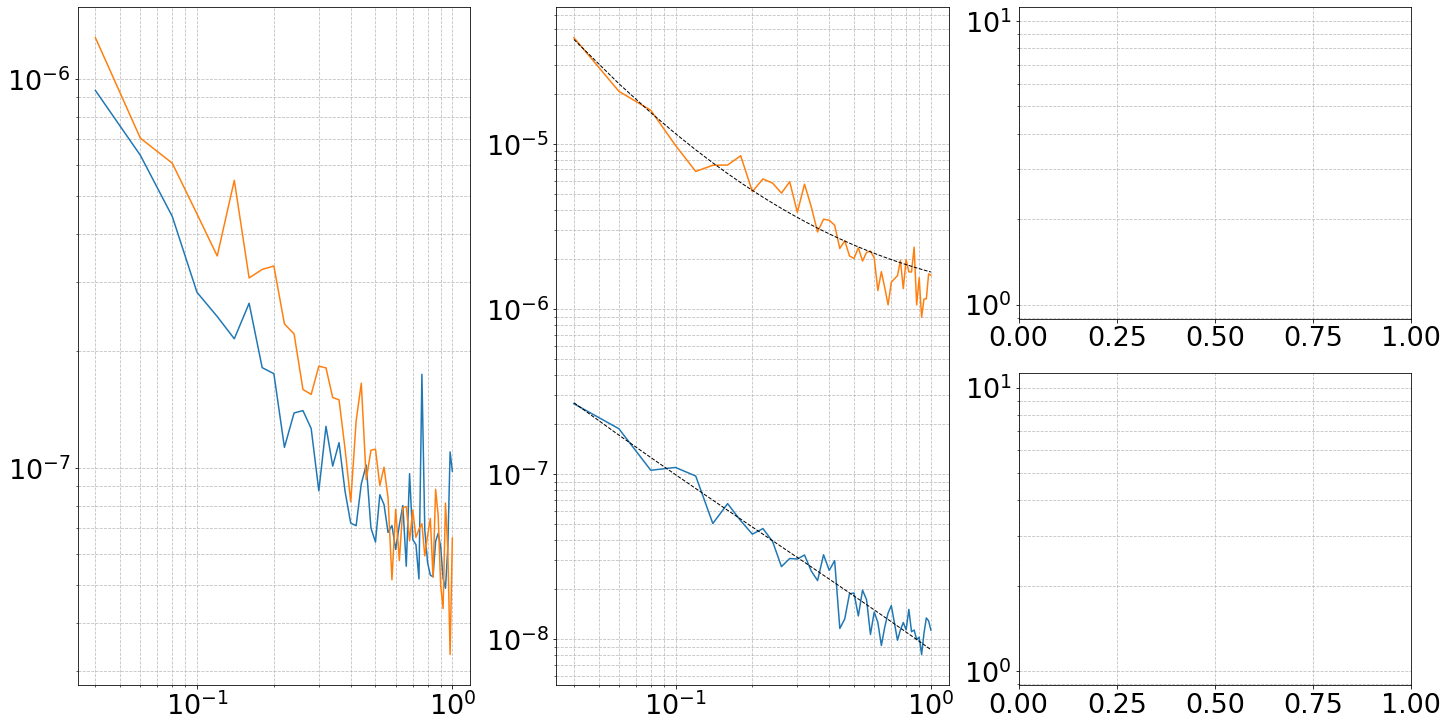

In [541]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import numpy as np
from scipy.optimize import curve_fit

# PSD model: 1/f + 1/f^2 + white noise
def psd_full(f, A1, A2, C):
    return A1 / f + A2 / f**2 + C

# Fitting function
def get_full_fit(x_data, y_data):
    valid = (x_data > 0) & (y_data > 0) & np.isfinite(y_data)
    x_clean = x_data[valid]
    y_clean = y_data[valid]
    params, pcov = curve_fit(psd_full, x_clean, y_clean, maxfev=10000)
    A1, A2, C = params
    a1_err = np.sqrt(pcov[0, 0])
    return A1, A2, C, x_clean, y_clean, a1_err

# Set font
font = {'size': 25}
matplotlib.rc('font', **font)

# Plot layout
fig = plt.figure(figsize=(20, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax0 = fig.add_subplot(gs[0:2, 0])
ax1 = fig.add_subplot(gs[0:2, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 2])
ax0.set_xscale('log', base=10)
ax0.set_yscale('log', base=10)
ax1.set_xscale('log', base=10)
ax1.set_yscale('log', base=10)
ax2.set_yscale('log', base=10)
ax3.set_yscale('log', base=10)

for ax in [ax0, ax1, ax2, ax3]:
    ax.grid(True, which="both", ls="--", alpha=0.8)
    ax.tick_params(labelsize=27)

# Results
a_pha = np.array([])
a_mag = np.array([])
a_pha_err = np.array([])
a_mag_err = np.array([])


idx_set = [0, 10,  15, 19]
# Fit loop
for i in range(len(pump_powers)):
    if i == 1:
        continue  # Skip this index

    try:
        A1, A2, C, xc_full, yc_full, a_err = get_full_fit(fft_freq[-49:], data_pha_mea[i][-49:])
        if i in idx_set:
            ax0.plot(xc_full, yc_full, '-', markersize=2, label=f'P = {int(pump_powers[i]-70)} dBm, G = {int(data_gain[i])} dB')
        A1, A2, C, xc, yc, a_err = get_full_fit(fft_freq[-249:], data_pha_mea[i][-49:])
        y_fit = psd_full(xc_full, A1, A2, C)
        if i in idx_set:
            ax0.plot(xc_full, y_fit, 'k--', linewidth=1)
        a_pha = np.append(a_pha, psd_full(1, A1, A2, C))
        a_pha_err = np.append(a_pha_err, a_err)
    except Exception as e:
        print(f"Phase fit failed at i={i}: {e}")

    try:
        A1, A2, C, xc_full, yc_full, a_err = get_full_fit(fft_freq[-49:], data_mag_mea[i][-49:])
        if i in idx_set:
            ax1.plot(xc_full, yc_full, '-', markersize=2, label=f'P = {int(pump_powers[i]-70)} dBm, G = {int(data_gain[i])} dB')
        A1, A2, C, xc, yc, a_err = get_full_fit(fft_freq[-49:], data_mag_mea[i][-49:])
        y_fit = psd_full(xc_full, A1, A2, C)
        if i in idx_set:
            ax1.plot(xc_full, y_fit, 'k--', linewidth=1)
        a_mag = np.append(a_mag, psd_full(1, A1, A2, C))
        a_mag_err = np.append(a_mag_err, a_err)
    except Exception as e:
        print(f"Magnitude fit failed at i={i}: {e}")


    
# Error bar plots at 1 Hz
if len(a_pha) > 0:
    ax2.errorbar(pump_powers[:len(a_pha)]-70, a_pha/data_gain[:len(a_pha)], yerr=a_pha_err*0, fmt='o-', markersize=5, capsize=4)
if len(a_mag) > 0:
    ax3.errorbar(pump_powers[:len(a_mag)]-70, a_mag/data_gain[:len(a_pha)]**2, yerr=a_mag_err*0, fmt='o-', markersize=5, capsize=4)
for a in [ax0, ax1]:
    a.axvline(1, color='red', linestyle='--', linewidth=2)
    a.set_xlim(left=fft_freq[-48], right=fft_freq[-1])
    
    
# Twin axis for gain
ax2_gain = ax2.twinx()
ax2_gain.plot(pump_powers[:len(a_pha)]-70, data_gain[:len(a_pha)], 's--', color='tab:green')
ax2_gain.set_ylabel('Gain (dB)', color='tab:green')
ax2_gain.tick_params(axis='y', labelcolor='tab:green', labelsize=25)
ax3_gain = ax3.twinx()
ax3_gain.plot(pump_powers[:len(a_pha)]-70, data_gain[:len(a_pha)], 's--', color='tab:green')
ax3_gain.set_ylabel('Gain (dB)', color='tab:green')
ax3_gain.tick_params(axis='y', labelcolor='tab:green', labelsize=25)

# Labels
ax0.set_ylabel('S($A^2$), dBm/Hz')
ax1.set_ylabel(r'S($\phi$), Rad$^2$/Hz')
ax0.set_xlabel('Freq, Hz')
ax1.set_xlabel('Freq, Hz')
ax2.set_ylabel('S(P) at 1Hz', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax3.set_ylabel(r'S($\phi$) at 1Hz', color='tab:blue')
ax3.tick_params(axis='y', labelcolor='tab:blue')
ax3.set_xlabel('Pump Power')
ax0.legend(fontsize=20)
ax1.legend(fontsize=20)

ax0.set_ylim(5e-10, 7e-4)
ax1.set_ylim(8e-9, 1e-2)
ax2.set_ylim(5e-10, 1.2e-4)
ax3.set_ylim(1.1e-10, 5e-4)



ax2_gain.set_ylim(-25, 30)
ax3_gain.set_ylim(-32.8, 30)


# Save and display
# plt.savefig(r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\paper_plots\Power_sweep_extended_model.png", dpi=300, bbox_inches='tight')
plt.show()


In [535]:
pump_powers[15]

8.5

In [347]:
xx = fft_freq[-249:]
yy = data_pha_mea[0][-249:]

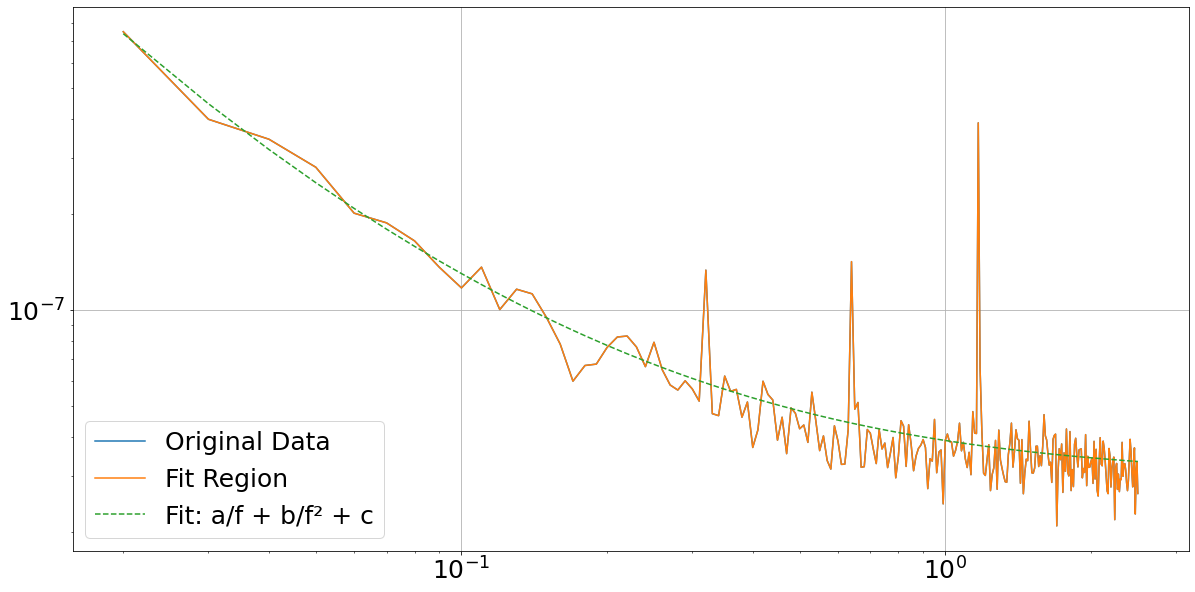

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Extended model: 1/f + 1/f² + white
def noise_model(f, a, b, c):
    return a / f + b / f**2 + c

def noise_fit(f, y):
    popt, pcov = curve_fit(noise_model, f, y)
    return popt  # returns a, b, c

# Example fit (replace `xx` and `yy` with real data)
a_fit, b_fit, c_fit = noise_fit(xx[:], yy[:])

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
ax.loglog(xx, yy, '-', label="Original Data")
ax.loglog(xx[:], yy[:], '-', label="Fit Region")
ax.loglog(xx, noise_model(xx, a_fit, b_fit, c_fit), '--', label="Fit: a/f + b/f² + c")

ax.legend()
plt.show()
